# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from collections import defaultdict
from pprint import pprint
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [32]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 634


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [33]:
city_url = "&limit=1&appid=6dfc548974455c092f67e13c01c355ae"
city_lati = []
city_lngi = []

for _, city in enumerate(cities):
    url_base = "http://api.openweathermap.org/geo/1.0/direct?q="
    url_city = cities[_]
    url_limit = "&limit=1&appid="
    url_weatherkey = weather_api_key

    city_url = "{}{}{}{}".format(url_base, url_city, url_limit, url_weatherkey)
    city_url
    
    
    response = requests.get(city_url)
    data = response.json()
    try: 
        x = str(data[0]['lat'])
        y = str(data[0]['lon'])
        city_lati.append(x)
        city_lngi.append(y)
    except:
        print('Could not find city: '+ str(city))
        pass

Could not find city: sentyabrskiy
Could not find city: lolua
Could not find city: tabiauea
Could not find city: taolanaro
Could not find city: cherskiy
Could not find city: macaboboni
Could not find city: tumannyy
Could not find city: asekeyevo
Could not find city: chistogorskiy
Could not find city: rantepao
Could not find city: bilopillya
Could not find city: saleaula
Could not find city: bambanglipuro
Could not find city: ilinsko-podomskoye
Could not find city: beringovskiy
Could not find city: novyy urengoy
Could not find city: promyshlennovskiy
Could not find city: chagda
Could not find city: uvelskiy
Could not find city: wahran
Could not find city: vitimskiy
Could not find city: mnogovershinnyy
Could not find city: meyungs
Could not find city: staryy nadym
Could not find city: shizunai
Could not find city: yar-sale
Could not find city: skalistyy
Could not find city: bardiyah


In [34]:
# Set the API base URL
city_url_base = "http://api.openweathermap.org/geo/1.0/direct?q="
city_url_limit = "&limit=1&appid="

weather_url_base = "https://api.openweathermap.org/data/2.5/weather?lat="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    
    url_city = city
    city_url_complete = "{}{}{}{}".format(url_base, url_city, url_limit, weather_api_key)        
  
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    urltexta = "&lon="
    urltextb = "&units=metric&appid="

    try:
        weather_url_complete = "{}{}{}{}{}{}".format(weather_url_base, city_lati[i], urltexta, city_lngi[i], urltextb, weather_api_key)
    except:
        pass
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        weather_url_complete
        response = requests.get(weather_url_complete)
        weather_json = response.json()

        #Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_json['coord']['lat']
        city_lng = weather_json['coord']['lon']
        city_max_temp = weather_json['main']['temp_max']
        city_humidity = weather_json['main']['humidity']
        city_clouds = weather_json['clouds']['all']
        city_wind = weather_json['wind']['speed']
        city_country = weather_json['sys']['country']
        city_date = time.strftime("%b %d, %Y, %a, %H:00", time.localtime(weather_json['dt']))

        #Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sentyabrskiy
Processing Record 2 of Set 1 | el alto
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | roebourne
Processing Record 5 of Set 1 | wajir
Processing Record 6 of Set 1 | katherine
Processing Record 7 of Set 1 | belaya gora
Processing Record 8 of Set 1 | khromtau
Processing Record 9 of Set 1 | basco
Processing Record 10 of Set 1 | ketchikan
Processing Record 11 of Set 1 | barrow
Processing Record 12 of Set 1 | te anau
Processing Record 13 of Set 1 | tukrah
Processing Record 14 of Set 1 | kamloops
Processing Record 15 of Set 1 | arraial do cabo
Processing Record 16 of Set 1 | dikson
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | carnarvon
Processing Record 19 of Set 1 | baley
Processing Record 20 of Set 1 | kuala terengganu
Processing Record 21 of Set 1 | clyde river
Processing Record 22 of Set 1 | hunza
Processing Record 23 of Set 1 | herman

In [35]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          632
Lat           632
Lng           632
Max Temp      632
Humidity      632
Cloudiness    632
Wind Speed    632
Country       632
Date          632
dtype: int64

In [36]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sentyabrskiy,-16.5048,-68.1624,6.18,93,75,3.09,BO,"Feb 07, 2023, Tue, 23:00"
1,el alto,-23.1230,-134.9680,26.34,73,67,3.78,PF,"Feb 07, 2023, Tue, 23:00"
2,rikitea,-20.7724,117.1458,34.47,43,54,6.84,AU,"Feb 07, 2023, Tue, 23:00"
3,roebourne,1.7505,40.0595,24.97,73,20,4.12,KE,"Feb 07, 2023, Tue, 23:00"
4,wajir,-14.4646,132.2636,36.17,44,40,2.06,AU,"Feb 07, 2023, Tue, 23:00"


In [37]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [38]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sentyabrskiy,-16.5048,-68.1624,6.18,93,75,3.09,BO,"Feb 07, 2023, Tue, 23:00"
1,el alto,-23.1230,-134.9680,26.34,73,67,3.78,PF,"Feb 07, 2023, Tue, 23:00"
2,rikitea,-20.7724,117.1458,34.47,43,54,6.84,AU,"Feb 07, 2023, Tue, 23:00"
3,roebourne,1.7505,40.0595,24.97,73,20,4.12,KE,"Feb 07, 2023, Tue, 23:00"
4,wajir,-14.4646,132.2636,36.17,44,40,2.06,AU,"Feb 07, 2023, Tue, 23:00"


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

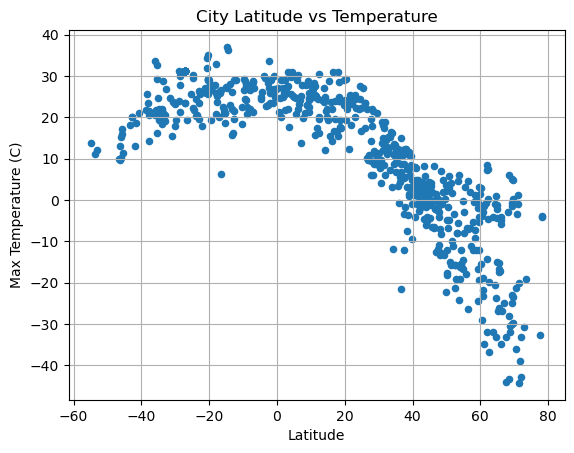

In [39]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter('Lat','Max Temp')

# Incorporate the other graph properties
plt.title("City Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

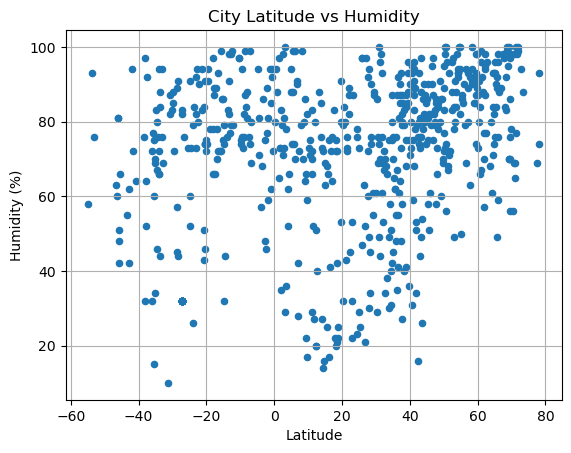

In [40]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter('Lat','Humidity')

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

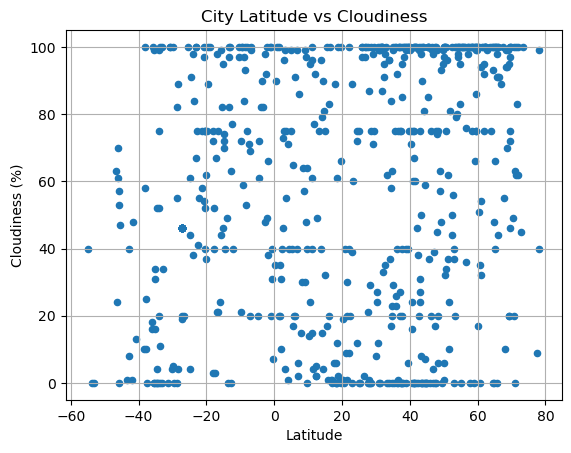

In [41]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter('Lat','Cloudiness')

# Incorporate the other graph properties

plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

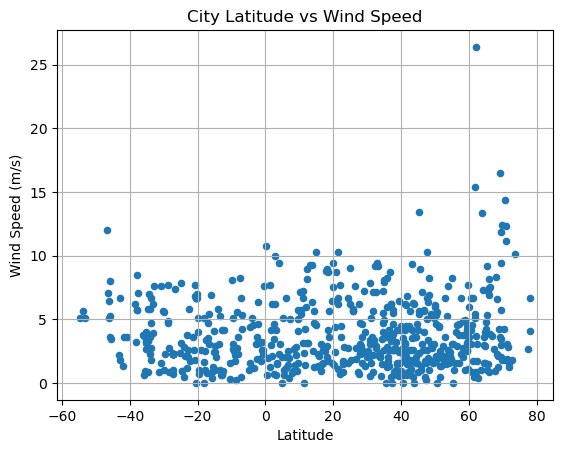

In [42]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter('Lat','Wind Speed')

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [43]:
# Define a function to create Linear Regression plots
#a = df, b = x ax, c = y ax, d = x axis title, e = y axis title, f = plt.title

def LinReg(a, b, c, d, e, f):
    x = a.iloc[:, b].values.reshape(-1, 1)
    y = a.iloc[:, c].values.reshape(-1, 1)
    lr = LinearRegression()
    lr.fit(x, y)
    y_pred = lr.predict(x)
    
    a.plot.scatter(northern_hemi_df.columns[b],northern_hemi_df.columns[c])
    

    plt.xlabel(str(d))
    plt.ylabel(str(e))
    plt.title(str(f))
    plt.plot(x, y_pred, color='red')
    return plt.show()

In [44]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,roebourne,1.7505,40.0595,24.97,73,20,4.12,KE,"Feb 07, 2023, Tue, 23:00"
5,katherine,68.5370,146.1873,-43.31,100,70,1.29,RU,"Feb 07, 2023, Tue, 23:00"
6,belaya gora,50.2569,58.4353,-18.11,100,100,5.32,KZ,"Feb 07, 2023, Tue, 23:00"
7,khromtau,40.3278,-91.2001,2.73,73,71,2.64,US,"Feb 07, 2023, Tue, 23:00"
8,basco,55.3431,-131.6467,3.26,87,100,3.09,US,"Feb 07, 2023, Tue, 23:00"


In [45]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df= city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sentyabrskiy,-16.5048,-68.1624,6.18,93,75,3.09,BO,"Feb 07, 2023, Tue, 23:00"
1,el alto,-23.1230,-134.9680,26.34,73,67,3.78,PF,"Feb 07, 2023, Tue, 23:00"
2,rikitea,-20.7724,117.1458,34.47,43,54,6.84,AU,"Feb 07, 2023, Tue, 23:00"
4,wajir,-14.4646,132.2636,36.17,44,40,2.06,AU,"Feb 07, 2023, Tue, 23:00"
10,barrow,-45.4145,167.7175,11.26,66,47,3.46,NZ,"Feb 07, 2023, Tue, 23:00"


###  Temperature vs. Latitude Linear Regression Plot

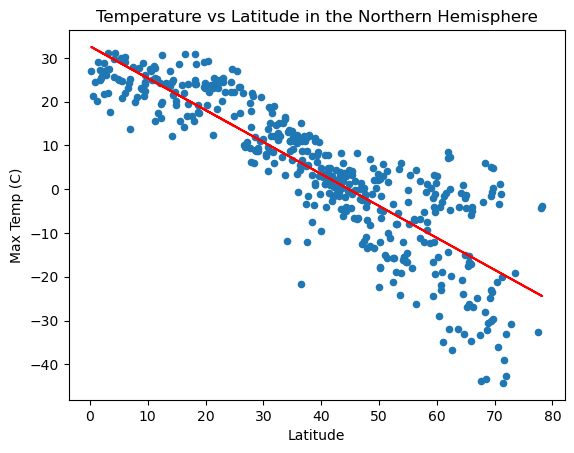

In [46]:
# Linear regression on Northern Hemisphere
LinReg(northern_hemi_df, 1, 3,
       "Latitude", 
       "Max Temp (C)",
       "Temperature vs Latitude in the Northern Hemisphere"
      )

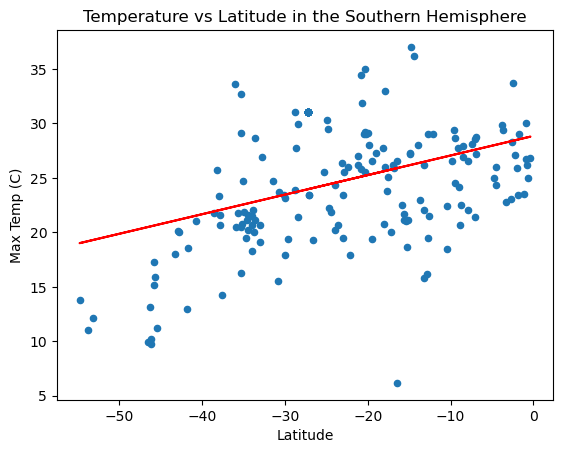

In [47]:
# Linear regression on Southern Hemisphere
LinReg(southern_hemi_df, 1, 3,
       "Latitude",
       "Max Temp (C)",
       "Temperature vs Latitude in the Southern Hemisphere"
      )

### Humidity vs. Latitude Linear Regression Plot

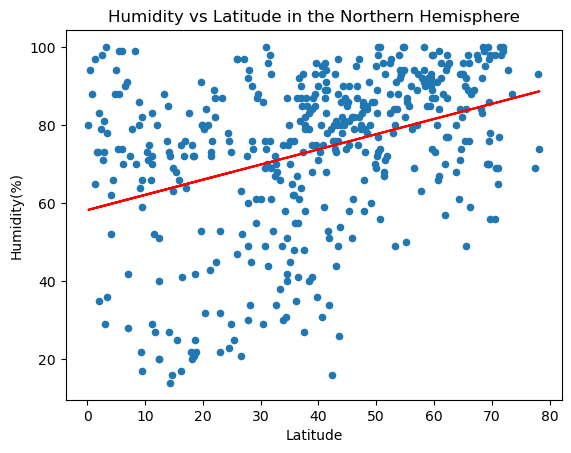

In [48]:
# Northern Hemisphere
LinReg(northern_hemi_df, 1, 4,
       "Latitude",
       "Humidity(%)",
       "Humidity vs Latitude in the Northern Hemisphere"
      )

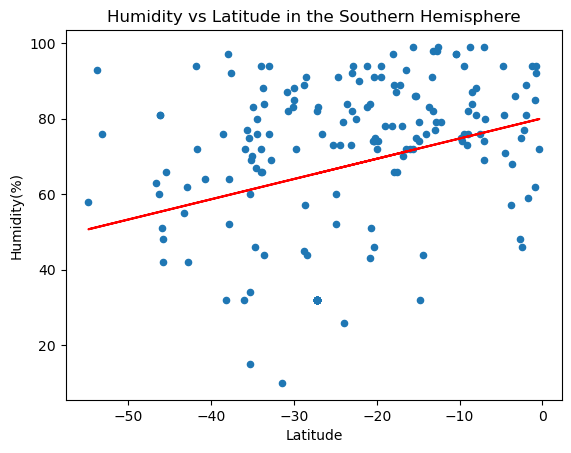

In [49]:
# Southern Hemisphere
LinReg(southern_hemi_df, 1, 4,
        "Latitude",
       "Humidity(%)",
       "Humidity vs Latitude in the Southern Hemisphere"
      )

### Cloudiness vs. Latitude Linear Regression Plot

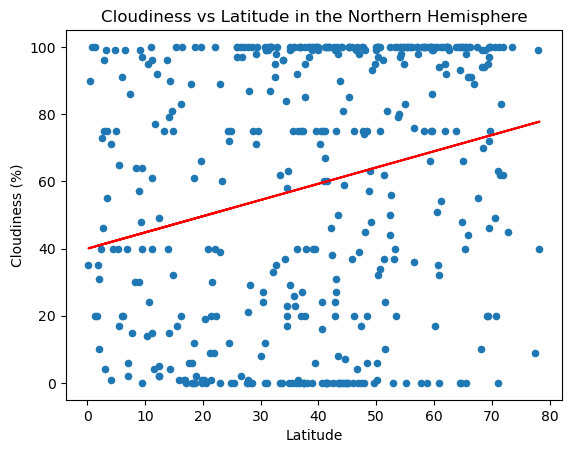

In [50]:
# Northern Hemisphere
LinReg(northern_hemi_df, 1, 5,
        "Latitude",
       "Cloudiness (%)",
       "Cloudiness vs Latitude in the Northern Hemisphere"
      )

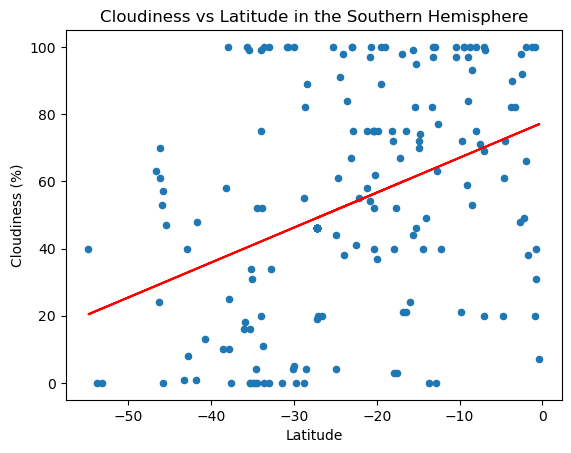

In [51]:
# Southern Hemisphere
LinReg(southern_hemi_df, 1, 5,
       "Latitude",
       "Cloudiness (%)",
       "Cloudiness vs Latitude in the Southern Hemisphere"
      )

### Wind Speed vs. Latitude Linear Regression Plot

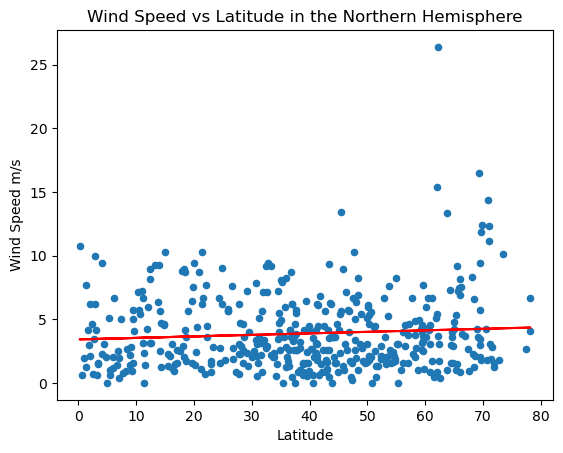

In [52]:
# Northern Hemisphere
LinReg(northern_hemi_df, 1, 6,
       "Latitude",
       "Wind Speed m/s",
       "Wind Speed vs Latitude in the Northern Hemisphere"
      )

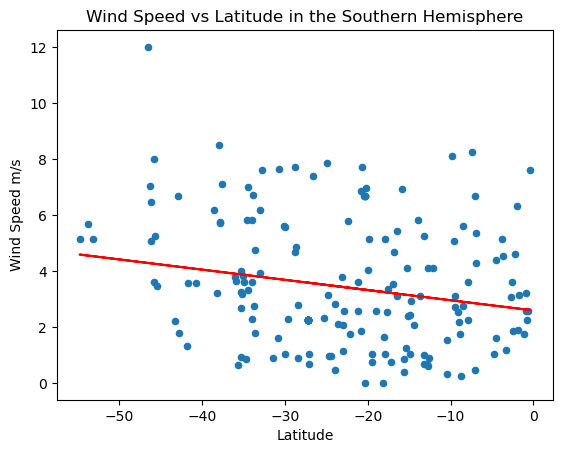

In [53]:
# Southern Hemisphere
LinReg(southern_hemi_df, 1, 6,
       "Latitude",
       "Wind Speed m/s",
       "Wind Speed vs Latitude in the Southern Hemisphere"
      )

**Discussion about the linear relationship on Wind Speed & Cloudiness Versus Latitude :** 
1.) Looking at the 'Wind Speeds vs Latitude in the Northern Hemisphere' shows a noticeable outlier to either discard or investigate. Perhaps there was a storm here during the data recording? 
2.) a significant majority of my dataset came from the northern hemisphere. 
3.) As Latitude moves away from 0, Both Humidity and Temperature approach 0. This makes sense when comparing to the general real world (Arctic/Antarctic temperatures/humidity) 
4.) "City Latitude vs Windspeed" Shows the opposite, where the speeds increase the further you get from Lat 0. 